## Annual Averages

Let's now begin with plotting the annual average per unit of latitude and longitude for temperature, and the cumulative sum of all cloud water content across the United States. First, let's import xarray, define the datafile, and calculate the means per grid cell.

In [1]:
import xarray as xarr

# open datafile
dataFile = "./data/clipped_daily_pressure_1988.nc"
data = xarr.open_dataset(dataFile)

# define means
mean_temp = (data["t"] - 273.15).mean(dim=["valid_time"])
mean_clwc = data["clwc"].mean(dim=["valid_time"])


Then, in order to see how the nationwide average changes over the years, we need to calculate the weighted average with respect to each individual grid cell. For this, we'll reference the [CDO documentation](https://code.mpimet.mpg.de/projects/cdo). First, let's load and calculate the spatial averages.

In [2]:
# using the climate data operators package
from cdo import Cdo
cdo = Cdo()

# define output file
outputFile = "./data/spatial_avgs.nc"

spatial_avg_file = cdo.fldmean(input=dataFile, output=outputFile)
spatial_avgs = xarr.open_dataset(outputFile)

Let's now convert it to a time series, squeezing it to fit it to one dimension. For the cloud water content, a more useful metric would be plotting the cumulative sum of all cloud water content across the United States.

In [3]:
# calculate nationwide average across the year
temp_timeseries = spatial_avgs["t"] - 273.15 # need to convert again
clwc_timeseries = spatial_avgs["clwc"].cumsum(dim=["lat","lon"])

temp_timeseries = temp_timeseries.squeeze()
clwc_timeseries = clwc_timeseries.squeeze()

Now, we can plot the annual average temperature across the continental United States ([using Cartopy and this reference](https://www.atmos.albany.edu/facstaff/ktyle/atm533_2022/core/week3/cartopy.html)).

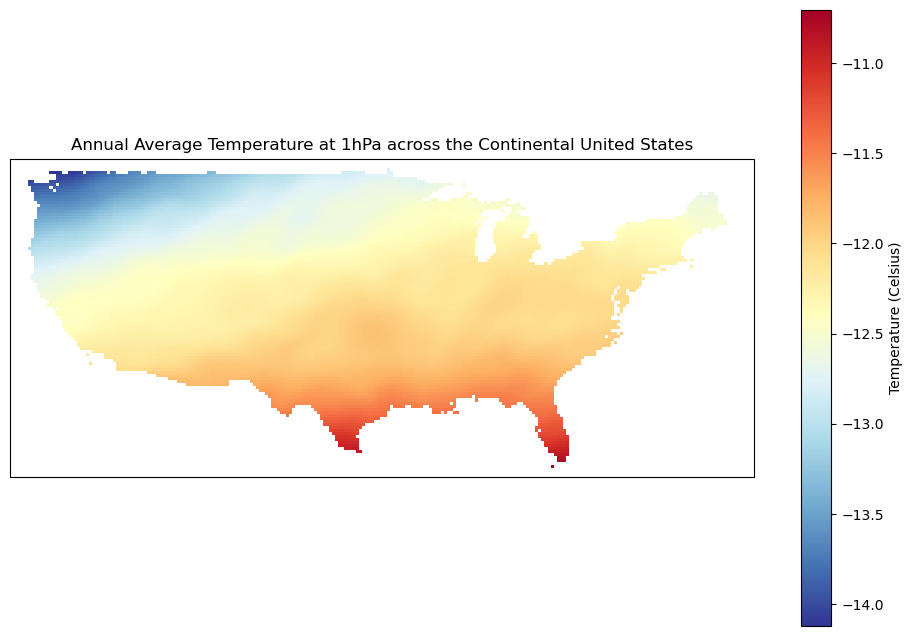

In [4]:
import matplotlib.pyplot as plot
import cartopy.crs as ccrs

# declare figure
theFigure = plot.subplots(figsize=(12, 8), subplot_kw={'projection': ccrs.PlateCarree()})

# make map, adjust colorbar
temp_plot = mean_temp.plot(transform=ccrs.PlateCarree(), cmap="RdYlBu_r", add_colorbar=True)
temp_plot.colorbar.set_label("Temperature (Celsius)")

# plot, save, show
plot.title("Annual Average Temperature at 1hPa across the Continental United States")
plot.savefig("./plots/Annual_Average_Heatmap_Temp_1hPa_CONUS.png")
plot.show()

Let's do same for the average cloud water content.

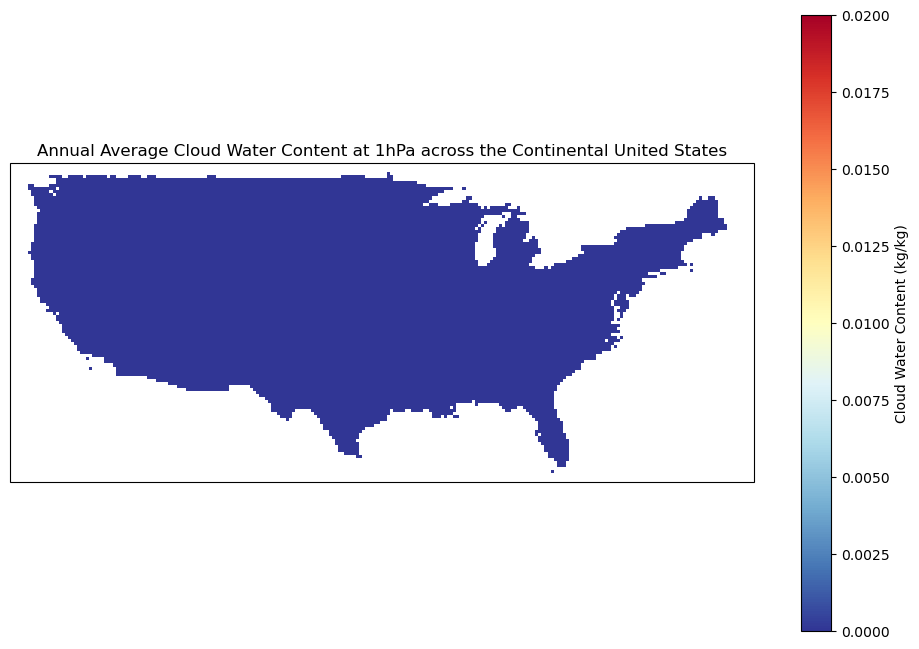

In [5]:
# declare figure
theFigure = plot.subplots(figsize=(12, 8), subplot_kw={'projection': ccrs.PlateCarree()})

# make map, adjust colorbar
clwc_plot = mean_clwc.plot(transform=ccrs.PlateCarree(), cmap="RdYlBu_r", vmin=0, vmax=0.02, add_colorbar=True)
clwc_plot.colorbar.set_label("Cloud Water Content (kg/kg)")

# plot, save, show
plot.title("Annual Average Cloud Water Content at 1hPa across the Continental United States")
plot.savefig("./plots/Annual_Average_Heatmap_CWLC_1hPA_CONUS.png")
plot.show()

(The altitude at which the pressure is 1hPa is so extreme that there is essentially zero cloud water content; hence, the near-uniform graph.)

We can also plot the annual average across the entire continental United States with a graph that shows how the temperature changes with time.

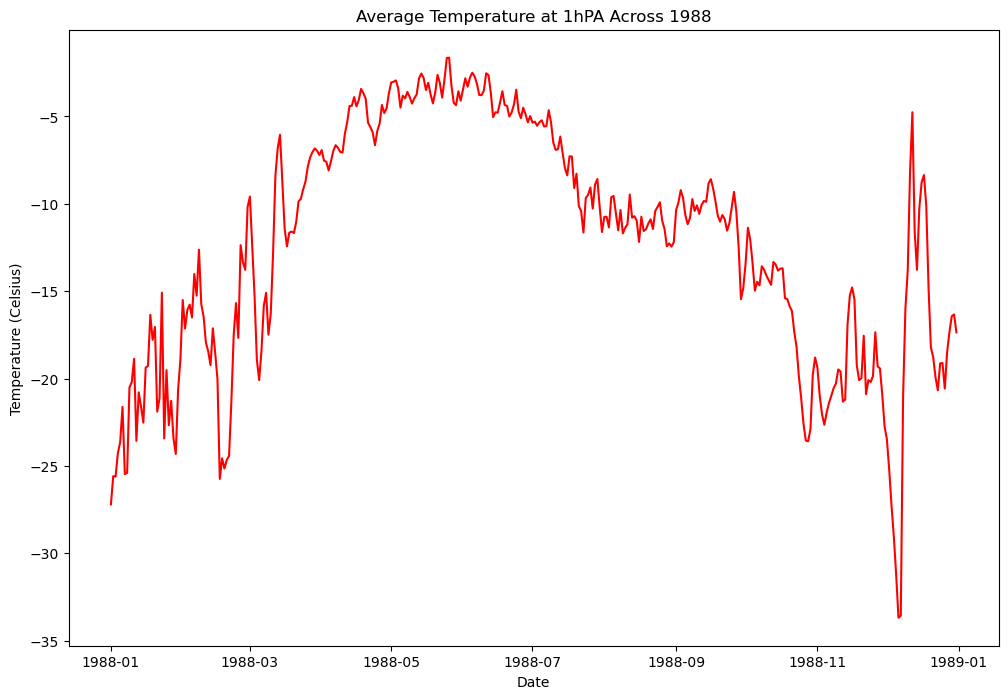

In [6]:
# create figure
theFigure = plot.subplots(figsize=(12,8))

# need to pass in the times, and then the data
plot.plot(temp_timeseries.valid_time, temp_timeseries, color="red")

# labels
plot.ylabel("Temperature (Celsius)")
plot.xlabel("Date")
plot.title("Average Temperature at 1hPA Across 1988")
plot.savefig("./plots/Average_Temperature_TimeSeries_1hPA_CONUS.png")
plot.show()

Finally, let's plot, save, and show the time series for the average cloud water content at 1hPa in 1988 across the continental United States.

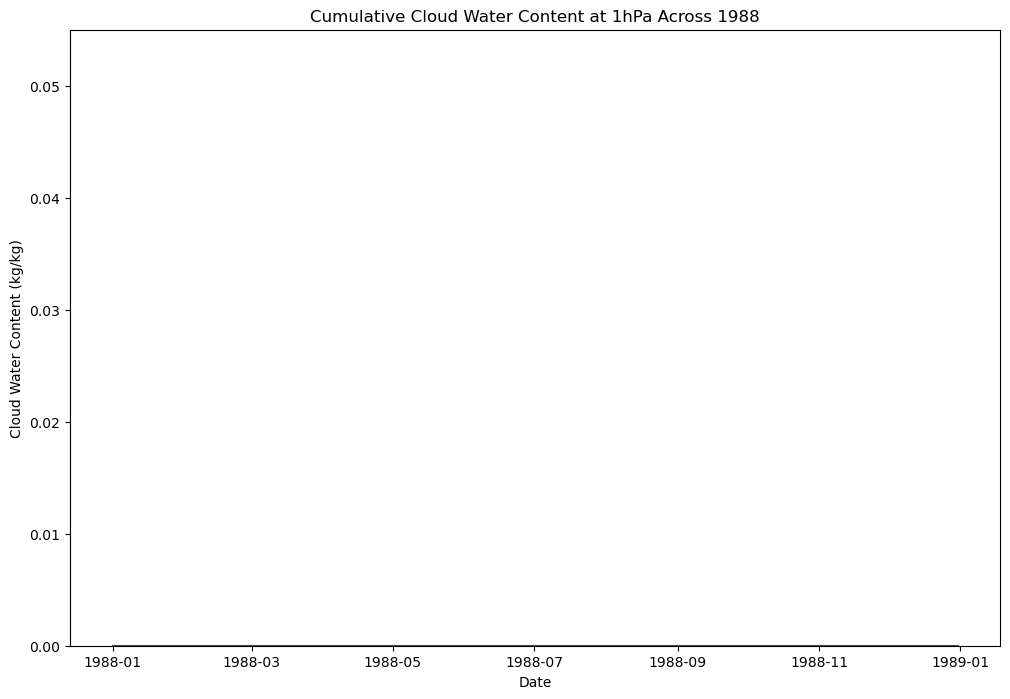

In [7]:
theFigure = plot.subplots(figsize=(12,8))
plot.plot(clwc_timeseries.valid_time, clwc_timeseries, color="red")
plot.ylabel("Cloud Water Content (kg/kg)")
plot.xlabel("Date")
plot.ylim(bottom=0)
plot.title("Cumulative Cloud Water Content at 1hPa Across 1988")
plot.savefig("./plots/Cumulative_CLWC_TimeSeries_1hPa_CONUS_1988.png")
plot.show()

(Once again, at that pressure, the cloud water content is so little you can't observe it on this graph.)